# Hands On

In [1]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline 

# K-Means on a randomly generated dataset

In [2]:
np.random.seed(0)

In [3]:
x, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(x)
print(y) #=> which cluster ?

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
[1 2 2 ... 0 1 1]


Don't mix up the x and y axes like in the previus labs! Here, each side is also x.

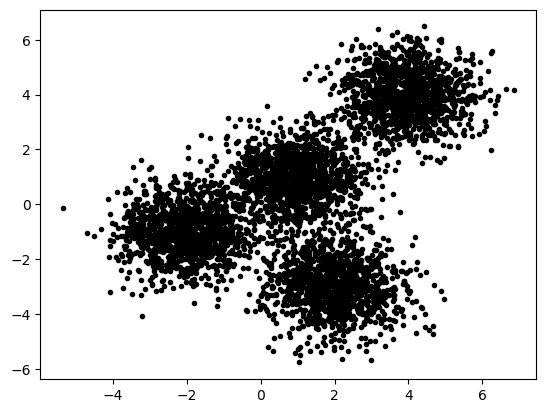

In [4]:
plt.scatter(x[:, 0], x[:, 1], marker='.', color="black")
plt.show()

# Setting up K-Means

In [5]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [6]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

# Creating the visual plot 

Spectral: it gives a suitable color range 
add_subplot: p1 = n-rows , p2 = n-cols, p3 = n-index

In [9]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels)))) #=> between 0 U 1 and 4 color
ax = fig.add_subplot(1, 1, 1) 
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [10]:
for k, col in zip(range(len([[4,4], [-2,-1], [2,-3], [1,1]])), colors): # or len(k_means_cluster_centers)
    my_members = (k_means_labels == k)
    print("My Members?:", my_members)
    cluster_center = k_means_cluster_centers[k]
    print("Cluster Center:", cluster_center)
    ax.plot(x[my_members, 0], x[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor='k', markersize=6)

My Members?: [ True False False ... False  True  True]
Cluster Center: [-2.03743147 -0.99782524]
My Members?: [False False False ...  True False False]
Cluster Center: [3.97334234 3.98758687]
My Members?: [False False False ... False False False]
Cluster Center: [0.96900523 0.98370298]
My Members?: [False  True  True ... False False False]
Cluster Center: [ 1.99741008 -3.01666822]


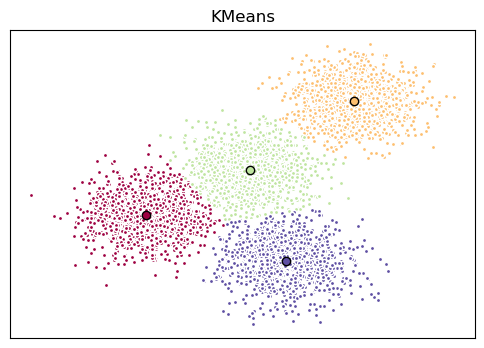

In [11]:
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()